# Domácí úkol


## 1. Spinograf
- **Úkol : nakreslete obrázek trajektorie bodu na spinografu pro zadané hodnoty**
    - $ R $  (poloměr větší kružnice),
    - $ r $  (poloměr menší kružnice), a
    - $ d $  (vzdálenost bodu od středu menší kružnice).
- Rozmyslete si kolik rotací musí menší kružnice udělat, aby se bod vrátil do své původní pozice. (vykreslete dráhu tak, aby byla uzavřená)
- Vyzkoušejte alespoň pro $R=10, r=3, d=1$ a $R=7, r=2, d=5$.
- Vykreslete pomocí tenké modré čáry, zvolte dostatek bodů, aby byla trajektorie plynulá (hladká).

---

### Co je to spinograf?
Jedná se o hru/výukovou pomůcku (viz. https://en.wikipedia.org/wiki/Spirograph).

Pro vysvětlení trajektorie bodu na spinografu (často označovaného jako hypotrochoida, když se menší kružnice otáčí uvnitř větší kružnice) použijeme goniometrický popis polohy bodu na kružnici v závislosti na úhlu rotace. Máme jednu větší kružnici s poloměrem  $ R $  a jednu menší kružnici s poloměrem  $ r $ , a chceme trasovat dráhu bodu, který je od středu menší kružnice vzdálen o vzdálenost  $ d $ .


### Poloha středu menší kružnice

Střed menší kružnice se otáčí uvnitř větší kružnice. Poloha středu menší kružnice v závislosti na úhlu  $ \theta $  je dána parametrickými rovnicemi v kartézských souřadnicích:

-  $ X = (R - r)  \cos(\theta) $ 
-  $ Y = (R - r)  \sin(\theta) $ 

kde  $ \theta $  je úhel rotace středu menší kružnice v radiánech.

### Otočení menší kružnice

Menší kružnice se otočí (valí se po větší kružnici). Úhel, o který se menší kružnice otočila ve svém vlastním středu vzhledem k počátečnímu bodu, je dán délkou oblouku, který urazila:
$$ \theta R $$

pokud chceme tento oblouk vyjádřit vzhledem k úhlu otočení v radiánech, o který se otočila menší kružnice ve svém středu,  převádíme zpětně z obvodu na úhel:
$$ \theta \frac{ R}{r} $$
poslední dvě důležitá pozotování jsou:
- malá kružnice se otočí negativně (tedy úhel je záporný)
- malá kružnice se otočí zároveň se svým středem, tedy k úhlu otočení musíme přičíst úhel $\theta$

Celkově máme:

$$ \phi = \theta - \theta \frac{R}{r} = - \theta \frac{R-r}{r} $$


### Pozice bodu na spinografu

Nakonec, sloučíme pozici středu a relativní pozici bodu ve vzdálenosti $d$ od středu menší kružnice

-  $ x = X + d \cos(\phi) = (R - r) \cos(\theta) + d \cos(- \theta \frac{R-r}{r})$ 
-  $ y = X + d \sin(\phi) = (R - r) \sin(\theta) + d \sin(- \theta \frac{R-r}{r})$ 

Pokud použijeme vlastnosti (sudost/lichost) gonimetricých funkcí, můžeme tyto rovnice zjednodušit na:

$$ x = (R - r) \cos(\theta) + d \cos(\theta \frac{R-r}{r})$$
$$ y = (R - r) \sin(\theta) - d \sin(\theta \frac{R-r}{r})$$

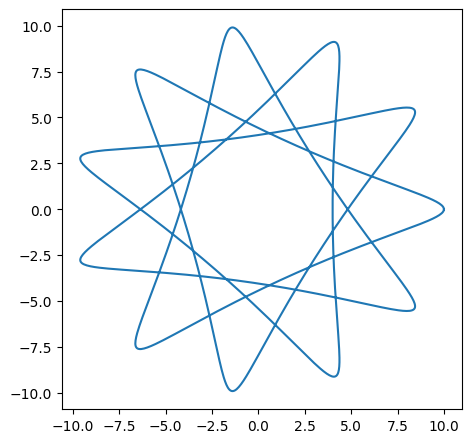

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#R, r, d = 10, 3, 1
#R, r, d = 7, 2, 5
R, r, d = 11, 4, 3
#R, r, d = np.sqrt(128), np.pi, np.e

θ = np.linspace(0, r*2*np.pi, 1000)
x = (R-r)*np.cos(θ) + d*np.cos(θ*(R-r)/r)
y = (R-r)*np.sin(θ) - d*np.sin(θ*(R-r)/r)

fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes((0, 0, 1, 1))
axes.plot(x, y)

# 2. Prvočíselná spirála


**Část 1.: Vykreslení "slunečnicových bodů"**

- Vykreslete tzv. "slunečnicové body". Tedy prvních `N` takových bodů.
- Vykreslete je tak aby byl vzor dobře vidět (zvolte vhodné velikosti bodů)

##### Co jsou to slunečnicové body?
Poloměr $ r $ a úhel $ \theta $ pro každý bod (číslované přirozenými čísly: $n=1,...,N$) jsou určeny následovně:

1. Zlatý úhel $ \phi $ je dán vztahem:
$$
\phi = \pi \cdot (3 - \sqrt{5})
$$

2. Poloměr $ r $ je odvozen z indexu bodu $ n $ jako:
$$
r = \sqrt{n}
$$

3. Úhel $ \theta $ pro bod $ n $ je vypočítán jako:
$$
\theta = n \cdot \phi
$$

Každý bod je poté umístěn pomocí kartézských souřadnic $(x, y)$, které jsou vypočítány pomocí:
$$
x = r \cdot \cos(\theta)
$$
$$
y = r \cdot \sin(\theta)
$$

**Část 2.: Vykreslení prvočíselné spirály**
- Vykreslete prvočíselnou spirálu pro prvních `N` prvočísel.
- Jedná se o stejný vzor jako v případě "slunečnicových bodů", ale tentokrát vykreslíme pouze body, které odpovídají prvočíslům.


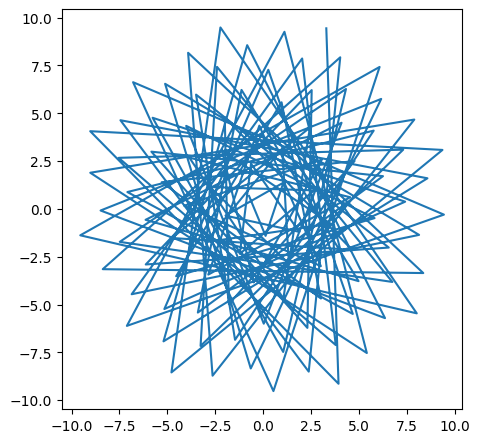

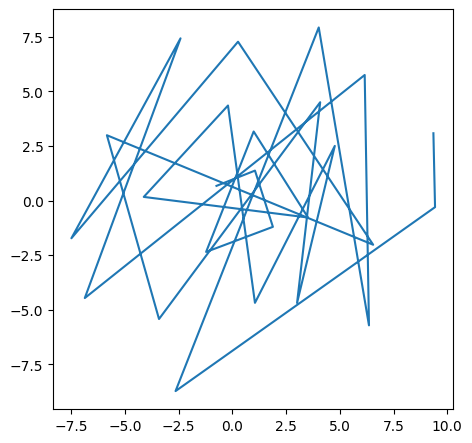

In [95]:
def je_prvocislo(n):
    for i in [2] + list(range(3, int(np.sqrt(n)+1), 2)):
        if n % i == 0:
            return False
    return True

def spirala(N, prvociselna):
    n = np.array([i for i in range(1, N+1) if (not prvociselna) or je_prvocislo(i)])
    ϕ = np.pi * (3 - np.sqrt(5))
    r = np.sqrt(n)
    θ = n * ϕ
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    return x, y


N = 100

x1, y1 = spirala(N, False)
fig = plt.figure(figsize=(4, 4))
axe = fig.add_axes((0, 0, 1, 1))
axe.plot(x1, y1)

x2, y2 = spirala(N, True)
fig = plt.figure(figsize=(4, 4))
axe = fig.add_axes((0, 0, 1, 1))
axe.plot(x2, y2)


# Bonusové úkoly
1. Modifikujte spinograf tak, aby menší kružnice:
    - se otáčela po vnější straně větší kružnice
    - se otáčela po rovnostraném n-úhelníku (trojúhelník, čtverec, šestiúhelník, ...)

In [ ]:
#TODO